## Reconhecimento de Espécies Florestais por Visão Computacional em Ambientes com Recursos Computacionais Limitados


### Desenvolvido por  

**André Rizzo**  
Cientista de Dados Sênior | Estatístico | MBA em IA e Big Data (USP)  
andrerizzo@hotmail.com  
http://www.linkedin.com/in/andrerizzo1  

### 1. Preparação do Ambiente

In [1]:
import os
import zipfile
import shutil

# 1. Baixar o ZIP do GitHub
ZIP_URL = "https://github.com/andrerizzo/Reconhecimento_de_Especies_Florestais/archive/refs/heads/master.zip"
ZIPFILE = "/content/Reconhecimento_de_Especies_Florestais.zip"

print("Baixando o dataset...")
!wget "$ZIP_URL" -O "$ZIPFILE"

# 2. Extrair o conteúdo
extract_path = "/content"

print("Extraindo arquivos...")
with zipfile.ZipFile(ZIPFILE, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 3. Mover os arquivos da subpasta para /content
extracted_folder = os.path.join(extract_path, "Reconhecimento_de_Especies_Florestais-master")

print("Movendo arquivos para a raiz do Colab...")
for item in os.listdir(extracted_folder):
    shutil.move(os.path.join(extracted_folder, item), extract_path)

# 4. Limpar: remover pasta intermediária e ZIP
print("Limpando arquivos temporários...")
shutil.rmtree(extracted_folder)
os.remove(ZIPFILE)

print("Processo finalizado com sucesso!")

Baixando o dataset...
--2025-04-09 01:50:42--  https://github.com/andrerizzo/Reconhecimento_de_Especies_Florestais/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/andrerizzo/Reconhecimento_de_Especies_Florestais/zip/refs/heads/master [following]
--2025-04-09 01:50:43--  https://codeload.github.com/andrerizzo/Reconhecimento_de_Especies_Florestais/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/content/Reconhecimento_de_Especies_Florestais.zip’

/content/Reconhecim     [ <=>                ]  39.63K  --.-KB/s    in 0.03s   

2025-04-09 01:50:43 (1.54 MB/s) - ‘/content/Reconhe

#### 1.1. Importação das Bibliotecas Necessárias

In [2]:
from src.data_acquisition import *
from src.preprocess import *
from src.build_model import *
from src.train_model import *
from src.evaluate_model import *

#### 1.2. Definição das Variáveis

In [3]:
# GOOGLE COLAB
UPLOAD_PATH = '/content'
PATH_DESTINO = '/content/images'
FILES_TO_DELETE_PATH = '/content/images/patches/class_9/0939*'
# Localização dos patches
IMAGES_PATH = '/content/images/patches'
#Localização dos patches já divididos em treino, validação e teste
train_path = '/content/images/train'
val_path = '/content/images/val'
test_path = '/content/images/test'


# MÁQUINA LOCAL
# Local onde os patches devem ser armazenados
#PATH_DESTINO = r'C:\Users\andre\teste'
# Localização dos patches a serem apagados
#FILES_TO_DELETE_PATH = r'C:\Users\andre\teste\patches\class_9\0939*'
# Localização dos patches
#IMAGES_PATH = r'C:\Users\andre\teste\patches'
#Localização dos patches já divididos em treino, validação e teste
#train_path = r'C:\Users\andre\teste\train'
#val_path = r'C:\Users\andre\teste\val'
#test_path = r'C:\Users\andre\teste\test'




---

<br>

### 2. Carregar Imagens

#### 2.1. Baixar os patches das imagens

In [4]:
ID_GOOGLE_IMAGES = ['1RajkAeTumEVBAbrq3BIVj8ELFm2USifw',
                    '1Sg0ZuRN5vRASb13mp5JVSkvRLeko_Mp8',
                    '1iPHhbOb7X8dc9c0PLj1uaw5PEmAUVrGh',
                    '1SHCsgrARnZIEZ43gauQf-8ycsk9OV3xy',
                    '18PW2ac7hGe494TAkGzg3IGEntktT6f9Q',
                    '1M9qKLrQ-Z98FTTW9Jo2xcpwjwSfHj3WN',
                    '1vGa8kdjsTlYQgM7mJzpteoKNE5IsGsz5']
n = 1
for id in ID_GOOGLE_IMAGES:
    zip_file = download_patches_file(id_google_drive_file=id,
                          path_destino=UPLOAD_PATH,
                          arquivo_destino=f'imagens{n}.zip'
                          )
    uncompress_patches(arquivo_zip=zip_file, path_destino=PATH_DESTINO)
    n=n+1



Downloading...
From (original): https://drive.google.com/uc?id=1RajkAeTumEVBAbrq3BIVj8ELFm2USifw
From (redirected): https://drive.google.com/uc?id=1RajkAeTumEVBAbrq3BIVj8ELFm2USifw&confirm=t&uuid=90e29ad8-dfc5-4344-b3be-c44686464fd1
To: /content/imagens1.zip
100%|██████████| 967M/967M [00:10<00:00, 90.3MB/s]



 Descompactando o arquivo /content/imagens1.zip ...

 Descompactação finalizada 



Downloading...
From (original): https://drive.google.com/uc?id=1Sg0ZuRN5vRASb13mp5JVSkvRLeko_Mp8
From (redirected): https://drive.google.com/uc?id=1Sg0ZuRN5vRASb13mp5JVSkvRLeko_Mp8&confirm=t&uuid=a6aa9d57-f17c-4169-bf90-bf8f990dd266
To: /content/imagens2.zip
100%|██████████| 953M/953M [00:08<00:00, 106MB/s]



 Descompactando o arquivo /content/imagens2.zip ...

 Descompactação finalizada 



Downloading...
From (original): https://drive.google.com/uc?id=1iPHhbOb7X8dc9c0PLj1uaw5PEmAUVrGh
From (redirected): https://drive.google.com/uc?id=1iPHhbOb7X8dc9c0PLj1uaw5PEmAUVrGh&confirm=t&uuid=cd42bd93-f372-4aba-a651-430080d522de
To: /content/imagens3.zip
100%|██████████| 958M/958M [00:14<00:00, 64.7MB/s]



 Descompactando o arquivo /content/imagens3.zip ...

 Descompactação finalizada 



Downloading...
From (original): https://drive.google.com/uc?id=1SHCsgrARnZIEZ43gauQf-8ycsk9OV3xy
From (redirected): https://drive.google.com/uc?id=1SHCsgrARnZIEZ43gauQf-8ycsk9OV3xy&confirm=t&uuid=5543b398-1a29-49c6-ae95-c27317ece7d8
To: /content/imagens4.zip
100%|██████████| 950M/950M [00:14<00:00, 65.7MB/s]



 Descompactando o arquivo /content/imagens4.zip ...

 Descompactação finalizada 



Downloading...
From (original): https://drive.google.com/uc?id=18PW2ac7hGe494TAkGzg3IGEntktT6f9Q
From (redirected): https://drive.google.com/uc?id=18PW2ac7hGe494TAkGzg3IGEntktT6f9Q&confirm=t&uuid=657f9eb2-9aa4-4a4f-a80e-254ec8649089
To: /content/imagens5.zip
100%|██████████| 993M/993M [00:13<00:00, 75.4MB/s]



 Descompactando o arquivo /content/imagens5.zip ...

 Descompactação finalizada 



Downloading...
From (original): https://drive.google.com/uc?id=1M9qKLrQ-Z98FTTW9Jo2xcpwjwSfHj3WN
From (redirected): https://drive.google.com/uc?id=1M9qKLrQ-Z98FTTW9Jo2xcpwjwSfHj3WN&confirm=t&uuid=5d7fe0da-ea9c-435f-99bb-9e0c1994076a
To: /content/imagens6.zip
100%|██████████| 983M/983M [00:09<00:00, 107MB/s]



 Descompactando o arquivo /content/imagens6.zip ...

 Descompactação finalizada 



Downloading...
From (original): https://drive.google.com/uc?id=1vGa8kdjsTlYQgM7mJzpteoKNE5IsGsz5
From (redirected): https://drive.google.com/uc?id=1vGa8kdjsTlYQgM7mJzpteoKNE5IsGsz5&confirm=t&uuid=b16ab75b-6059-44bd-9992-a704fb9786d2
To: /content/imagens7.zip
100%|██████████| 245M/245M [00:02<00:00, 113MB/s]



 Descompactando o arquivo /content/imagens7.zip ...

 Descompactação finalizada 



In [5]:
files_to_delete = glob.glob(FILES_TO_DELETE_PATH)

for file in files_to_delete:
    os.remove(file)
print(f'Arquivos deletados com sucesso !')

Arquivos deletados com sucesso !


#### 2.2. Gera lista das imagens existentes e respectivas classes

In [6]:
X_temp = gera_lista(image_path=IMAGES_PATH)

X = X_temp['imagem']
y = X_temp['classe']

#### 2.3. Gera lista de imagens que serão usadas para **treino**, **teste** e **validação**

In [7]:
X_train, X_test = train_test_val(image_ds=X, tam_teste=0.1,
                                 estratifica=y)
X_train, X_val = train_test_val(image_ds=X_train, tam_teste=0.2,
                                estratifica=y[X_train.index])

print(f'Número de imagens para treinamento: {len(X_train)}')
print(f'Número de imagens para validação: {len(X_val)}')
print(f'Número de imagens para teste: {len(X_test)}')

Número de imagens para treinamento: 2116
Número de imagens para validação: 530
Número de imagens para teste: 295


#### 2.4. Criação dos diretórios onde os symlinks serão armazenados

In [8]:
train_path, test_path, val_path =  folder_creation(root_patches_folder=PATH_DESTINO)

Diretórios de treinamento criados com sucesso ! 

Diretórios de validação criados com sucesso ! 

Diretórios de teste criados com sucesso ! 



#### 2.5. Criação dos symlinks

In [9]:
# Cria symlinks para imagens de treinamento
origem = IMAGES_PATH
destino = train_path
symlink(X_train, origem, destino)


# Cria symlinks para imagens de validação
origem =IMAGES_PATH
destino = val_path
symlink(X_val, origem, destino)


# Cria symlinks para imagens de teste
origem = IMAGES_PATH
destino = test_path
symlink(X_test, origem, destino)

Creating symlinks: 100%|██████████| 295/295 [00:00<00:00, 296.90it/s]


---

<br>

### 3. Pré-Processamento dos Dados

#### 3.1. Criação dos datasets de treino, validação e teste

In [10]:
train_ds = gera_dataset_train_test_val(train_path,
                                       classes='inferred',
                                       tipo_classes='categorical',
                                       tam_batch=32,
                                       tam_imagem=(224,224),
                                       aleatorio=True,
                                       percent_val=None,
                                       subconjunto=None,
                                       symlink=True
                                       )

val_ds = gera_dataset_train_test_val(val_path,
                                     classes='inferred',
                                     tipo_classes='categorical',
                                     tam_batch=32,
                                     tam_imagem=(224,224),
                                     aleatorio=False,
                                     percent_val=None,
                                     subconjunto=None,
                                     symlink=True
                                    )

test_ds = gera_dataset_train_test_val(test_path,
                                      classes='inferred',
                                      tipo_classes='categorical',
                                      tam_batch=32,
                                      tam_imagem=(224,224),
                                      aleatorio=False,
                                      percent_val=None,
                                      subconjunto=None,
                                      symlink=True
                                       )

Found 296240 files belonging to 41 classes.
Found 74200 files belonging to 41 classes.
Found 41300 files belonging to 41 classes.


In [11]:
train_class_names = train_ds.class_names
print("Train classes:", train_class_names)

Train classes: ['class_01', 'class_02', 'class_03', 'class_04', 'class_05', 'class_06', 'class_07', 'class_08', 'class_09', 'class_10', 'class_11', 'class_12', 'class_13', 'class_14', 'class_15', 'class_16', 'class_17', 'class_18', 'class_19', 'class_20', 'class_21', 'class_22', 'class_23', 'class_24', 'class_25', 'class_26', 'class_27', 'class_28', 'class_29', 'class_30', 'class_31', 'class_32', 'class_33', 'class_34', 'class_35', 'class_36', 'class_37', 'class_38', 'class_39', 'class_40', 'class_41']


#### 3.2. Normalização dos datasets

In [12]:
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input as mobilenetv3_preprocess

train_images_norm = preprocess(dataset=train_ds,
                               preprocessing_fn=mobilenetv3_preprocess)

val_images_norm = preprocess(dataset=val_ds,
                             preprocessing_fn=mobilenetv3_preprocess)

test_images_norm = preprocess(dataset=test_ds,
                              preprocessing_fn=mobilenetv3_preprocess)

---

<br>

### 4. Modelo MobileNet v3 Large v1

#### 4.1. Criação e compilação do modelo MobileNetv3 Large v1

In [15]:
model_mobilenetv3_large_v1 = build_model_mobilenetv3_large_v1(formato_imagem=(224,224,3), num_classes=41)
model_mobilenetv3_large_v1 = compile_model_mobilenetv3(modelo=model_mobilenetv3_large_v1, lr_rate=0.0001)
model_mobilenetv3_large_v1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 112, 112, 16)   │            432 │ rescaling_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 112, 112, 16)   │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_20             │ (None, 112, 112, 16)   │              0 │ conv_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 16)   │            144 │ activation_20[0][0]    │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 16)   │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_19 (ReLU)           │ (None, 112, 112, 16)   │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            256 │ re_lu_19[0][0]         │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_bn  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_add (Add)   │ (None, 112, 112, 16)   │              0 │ activation_20[0][0],   │
│                           │                        │                │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_expand    │ (None, 112, 112, 64)   │          1,024 │ expanded_conv_add[0][… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_expand_bn │ (None, 112, 112, 64)   │            256 │ expanded_conv_1_expan… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_20 (ReLU)           │ (None, 112, 112, 64)   │              0 │ expanded_conv_1_expan… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_depth

 Total params: 3,630,249 (13.85 MB)

 Trainable params: 633,897 (2.42 MB)

 Non-trainable params: 2,996,352 (11.43 MB)

#### 4.2. Treinamento do modelo MobileNetv3 Large v1

In [16]:
history_mobilenet_large_v1 = train_model(model=model_mobilenetv3_large_v1,
                      train_images=train_images_norm,
                      val_images=val_images_norm,
                      output_dir='models',
                      model_file_name='MobileNetv3_large_v1_.keras',
                      epochs=20,
                      patience=5,
                      min_lr_ROP=0.00001,
                      factorROP=0.5,
                      patienceROP=3
                      )

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_209']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


9258/9258 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5301 - loss: 0.3513
Epoch 1: val_accuracy improved from -inf to 0.83965, saving model to models/MobileNetv3_large_v1_.keras
9258/9258 ━━━━━━━━━━━━━━━━━━━━ 130s 13ms/step - accuracy: 0.5301 - loss: 0.3512 - val_accuracy: 0.8396 - val_loss: 0.0848 - learning_rate: 1.0000e-04
Epoch 2/20
9253/9258 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8148 - loss: 0.0959
Epoch 2: val_accuracy improved from 0.83965 to 0.86891, saving model to models/MobileNetv3_large_v1_.keras
9258/9258 ━━━━━━━━━━━━━━━━━━━━ 106s 11ms/step - accuracy: 0.8148 - loss: 0.0958 - val_accuracy: 0.8689 - val_loss: 0.0670 - learning_rate: 1.0000e-04
Epoch 3/20
9256/9258 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8532 - loss: 0.0717
Epoch 3: val_accuracy improved from 0.86891 to 0.87881, saving model to models/MobileNetv3_large_v1_.keras
9258/9258 ━━━━━━━━━━━━━━━━━━━━ 105s 11ms/step - accuracy: 0.8532 - loss: 0.0717 - val_accuracy: 0.8788 - val_loss: 0.0611 - lear

#### 4.3. Avaliação do modelo MobileNetv3 Large v1

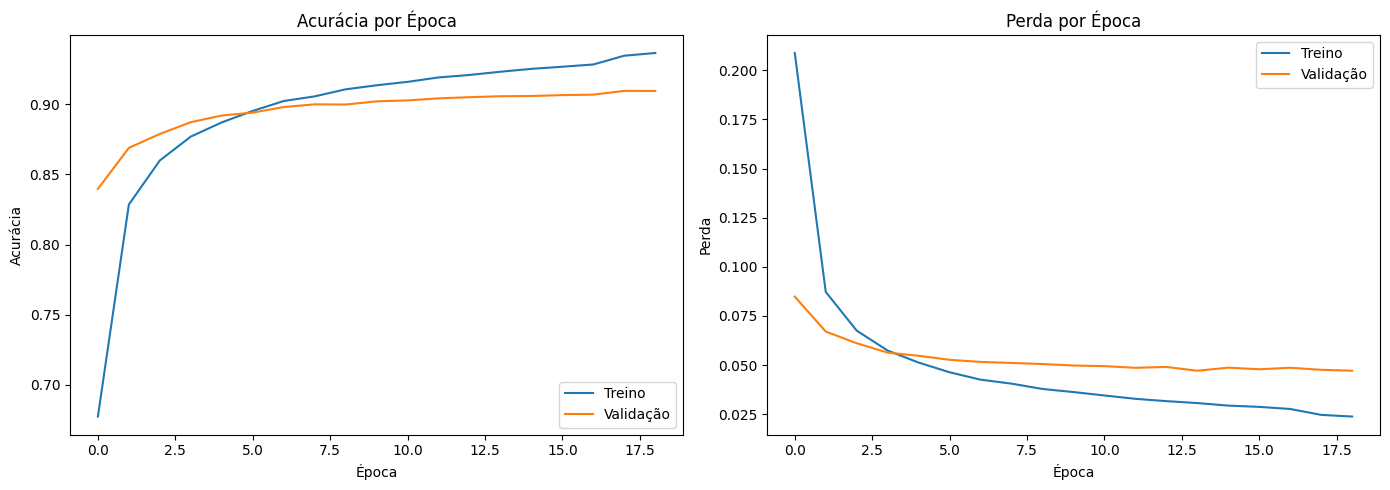

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_209']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



Relatório de Classificação:
              precision    recall  f1-score   support

    class_01       0.79      0.91      0.84       700
    class_02       0.93      0.98      0.96       840
    class_03       0.85      0.89      0.87       560
    class_04       0.93      0.95      0.94      1400
    class_05       0.80      0.68      0.73       840
    class_06       0.74      0.95      0.83       560
    class_07       0.91      0.93      0.92       700
    class_08       0.98      0.97      0.98      1120
    class_09       0.96      0.90      0.93       980
    class_10       0.98      0.94      0.96      1400
    class_11       0.86      0.85      0.86       560
    class_12       0.88      0.83      0.86      1400
    class_13       0.89      0.90      0.89       840
    class_14       0.92      0.84      0.88       980
    class_15       0.91      0.63      0.75       700
    class_16       0.98      0.96      0.97      1120
    class_17       0.81      0.93      0.86      140

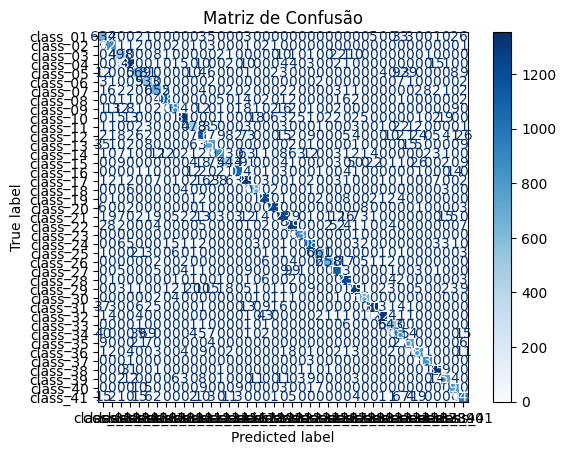

In [17]:
plot_training_history(history=history_mobilenet_large_v1)
performance_metrics(model=model_mobilenetv3_large_v1,
                    test_dataset=test_images_norm,
                    class_names=train_class_names
                    )

---

<br>

### 5. Modelo MobileNet v3 Large v2

#### 5.1. Criação e compilação do modelo

In [18]:
model_mobilenetv3_large_v2 = build_model_mobilenetv3_large_v2(formato_imagem=(224,224,3), num_classes=41)
model_mobilenetv3_large_v2 = compile_model_mobilenetv3(modelo=model_mobilenetv3_large_v2, lr_rate=0.0001)
model_mobilenetv3_large_v2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 112, 112, 16)   │            432 │ rescaling_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 112, 112, 16)   │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_40             │ (None, 112, 112, 16)   │              0 │ conv_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 16)   │            144 │ activation_40[0][0]    │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 16)   │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_38 (ReLU)           │ (None, 112, 112, 16)   │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            256 │ re_lu_38[0][0]         │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_bn  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_add (Add)   │ (None, 112, 112, 16)   │              0 │ activation_40[0][0],   │
│                           │                        │                │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_expand    │ (None, 112, 112, 64)   │          1,024 │ expanded_conv_add[0][… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_expand_bn │ (None, 112, 112, 64)   │            256 │ expanded_conv_1_expan… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_39 (ReLU)           │ (None, 112, 112, 64)   │              0 │ expanded_conv_1_expan… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_depth

 Total params: 3,630,249 (13.85 MB)

 Trainable params: 3,605,849 (13.76 MB)

 Non-trainable params: 24,400 (95.31 KB)

#### 5.2. Treinamento do modelo MobileNetv3 Large v2

In [19]:
history_mobilenet_large_v2 = train_model(model=model_mobilenetv3_large_v2,
                      train_images=train_images_norm,
                      val_images=val_images_norm,
                      output_dir='models',
                      model_file_name='MobileNetv3_large_v2_.keras',
                      epochs=20,
                      patience=5,
                      min_lr_ROP=0.00001,
                      factorROP=0.5,
                      patienceROP=3
                      )


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_418']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


9258/9258 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7040 - loss: 0.2235
Epoch 1: val_accuracy improved from -inf to 0.95648, saving model to models/MobileNetv3_large_v2_.keras
9258/9258 ━━━━━━━━━━━━━━━━━━━━ 343s 31ms/step - accuracy: 0.7041 - loss: 0.2235 - val_accuracy: 0.9565 - val_loss: 0.0258 - learning_rate: 1.0000e-04
Epoch 2/20
9258/9258 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9606 - loss: 0.0184
Epoch 2: val_accuracy improved from 0.95648 to 0.96357, saving model to models/MobileNetv3_large_v2_.keras
9258/9258 ━━━━━━━━━━━━━━━━━━━━ 248s 27ms/step - accuracy: 0.9606 - loss: 0.0184 - val_accuracy: 0.9636 - val_loss: 0.0237 - learning_rate: 1.0000e-04
Epoch 3/20
9256/9258 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9755 - loss: 0.0101
Epoch 3: val_accuracy improved from 0.96357 to 0.96915, saving model to models/MobileNetv3_large_v2_.keras
9258/9258 ━━━━━━━━━━━━━━━━━━━━ 244s 26ms/step - accuracy: 0.9755 - loss: 0.0101 - val_accuracy: 0.9692 - val_loss: 0.0207 - le

#### 5.3. Avaliação do modelo MobileNetv3 Large v2

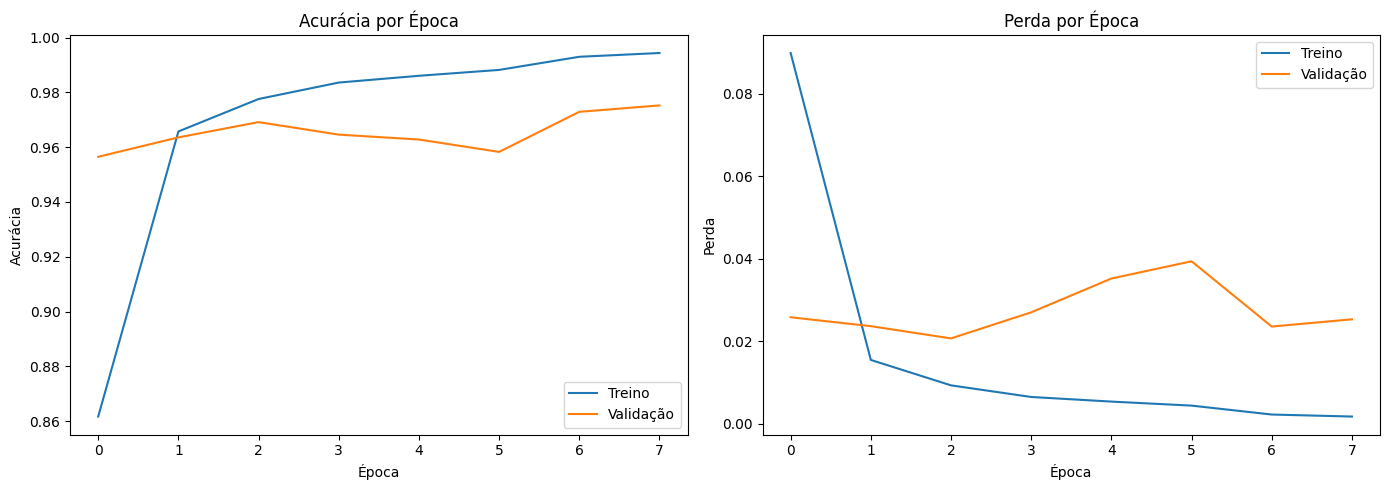

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_418']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



Relatório de Classificação:
              precision    recall  f1-score   support

    class_01       0.93      0.92      0.92       700
    class_02       1.00      0.98      0.99       840
    class_03       0.99      0.99      0.99       560
    class_04       0.98      1.00      0.99      1400
    class_05       0.98      0.67      0.80       840
    class_06       0.83      0.99      0.91       560
    class_07       0.99      0.98      0.99       700
    class_08       1.00      0.99      0.99      1120
    class_09       1.00      0.98      0.99       980
    class_10       1.00      0.98      0.99      1400
    class_11       0.96      0.98      0.97       560
    class_12       0.99      0.95      0.97      1400
    class_13       0.97      0.92      0.94       840
    class_14       0.96      0.98      0.97       980
    class_15       0.95      0.92      0.94       700
    class_16       1.00      1.00      1.00      1120
    class_17       0.98      0.99      0.98      140

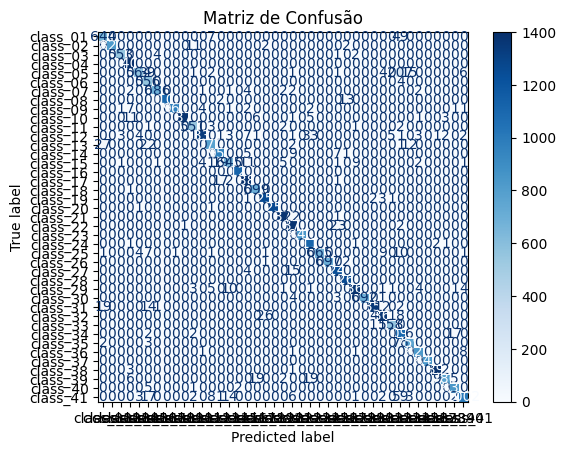

In [20]:
plot_training_history(history=history_mobilenet_large_v2)
performance_metrics(model=model_mobilenetv3_large_v2,
                    test_dataset=test_images_norm,
                    class_names=train_class_names
                    )

---

<br>

### 6. Modelo MobileNetv3 Small v1

#### 6.1. Criação e compilação do modelo

In [21]:
model_mobilenetv3_small_v1 = build_model_mobilenetv3_small_v1(formato_imagem=(224,224,3), num_classes=41)
model_mobilenetv3_small_v1 = compile_model_mobilenetv3(modelo=model_mobilenetv3_small_v1, lr_rate=0.0001)
model_mobilenetv3_small_v1.summary()

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 112, 112, 16)   │            432 │ rescaling_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 112, 112, 16)   │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_60             │ (None, 112, 112, 16)   │              0 │ conv_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 113, 113, 16)   │              0 │ activation_60[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 56, 56, 16)     │            144 │ expanded_conv_depthwi… │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 56, 56, 16)     │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_57 (ReLU)           │ (None, 56, 56, 16)     │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │              0 │ re_lu_57[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │            136 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │              0 │ expanded_conv_squeeze… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │            144 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_24 (Add)              │ (None, 1, 1, 16)       │              0 │ expanded_conv_squeeze… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_58 (ReLU)      

 Total params: 1,376,409 (5.25 MB)

 Trainable params: 1,364,297 (5.20 MB)

 Non-trainable params: 12,112 (47.31 KB)

#### 6.2. Treinamento do modelo MobileNetv3 Large v2

In [22]:
history_mobilenet_small_v1 = train_model(model=model_mobilenetv3_small_v1,
                      train_images=train_images_norm,
                      val_images=val_images_norm,
                      output_dir='models',
                      model_file_name='MobileNetv3_small_v1_.keras',
                      epochs=20,
                      patience=5,
                      min_lr_ROP=0.00001,
                      factorROP=0.5,
                      patienceROP=3
                      )


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_627']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


9258/9258 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6561 - loss: 0.2543
Epoch 1: val_accuracy improved from -inf to 0.94929, saving model to models/MobileNetv3_small_v1_.keras
9258/9258 ━━━━━━━━━━━━━━━━━━━━ 262s 23ms/step - accuracy: 0.6561 - loss: 0.2543 - val_accuracy: 0.9493 - val_loss: 0.0265 - learning_rate: 1.0000e-04
Epoch 2/20
9257/9258 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9450 - loss: 0.0248
Epoch 2: val_accuracy improved from 0.94929 to 0.96057, saving model to models/MobileNetv3_small_v1_.keras
9258/9258 ━━━━━━━━━━━━━━━━━━━━ 160s 17ms/step - accuracy: 0.9450 - loss: 0.0248 - val_accuracy: 0.9606 - val_loss: 0.0222 - learning_rate: 1.0000e-04
Epoch 3/20
9256/9258 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9651 - loss: 0.0144
Epoch 3: val_accuracy improved from 0.96057 to 0.96088, saving model to models/MobileNetv3_small_v1_.keras
9258/9258 ━━━━━━━━━━━━━━━━━━━━ 165s 18ms/step - accuracy: 0.9651 - loss: 0.0144 - val_accuracy: 0.9609 - val_loss: 0.0224 - le

#### 6.3. Avaliação do modelo MobileNetv3 Small v1

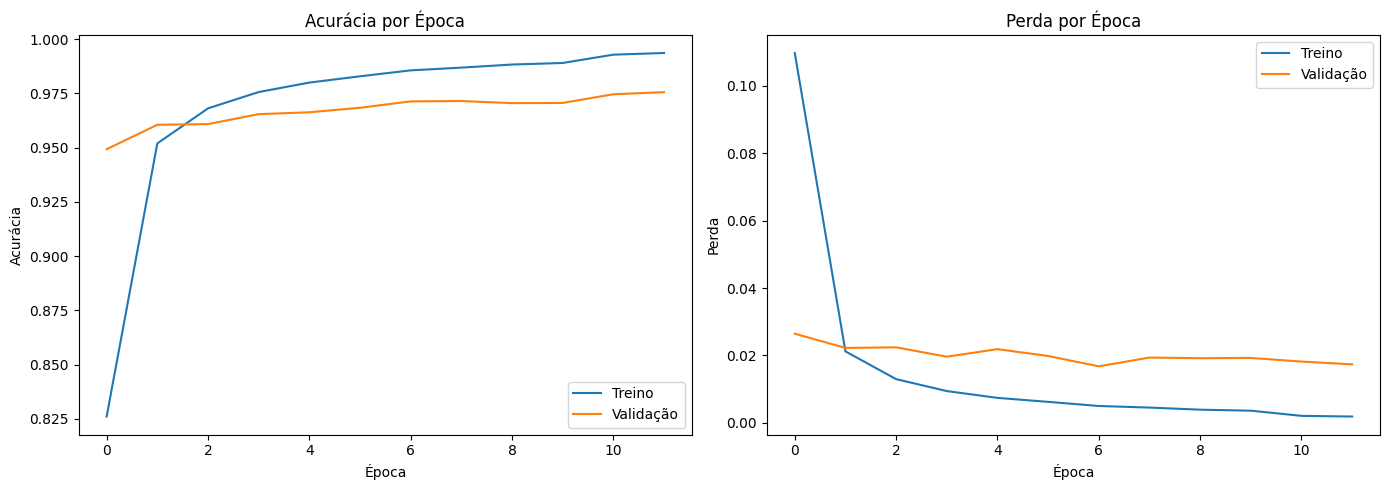

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_627']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



Relatório de Classificação:
              precision    recall  f1-score   support

    class_01       0.94      0.98      0.96       700
    class_02       1.00      1.00      1.00       840
    class_03       0.96      0.98      0.97       560
    class_04       0.99      0.99      0.99      1400
    class_05       0.97      0.89      0.93       840
    class_06       0.91      1.00      0.95       560
    class_07       1.00      0.97      0.98       700
    class_08       1.00      0.99      0.99      1120
    class_09       1.00      0.98      0.99       980
    class_10       1.00      0.99      0.99      1400
    class_11       0.99      0.97      0.98       560
    class_12       0.99      0.97      0.98      1400
    class_13       0.96      0.94      0.95       840
    class_14       0.98      0.97      0.98       980
    class_15       0.97      0.95      0.96       700
    class_16       0.99      1.00      1.00      1120
    class_17       0.98      0.98      0.98      140

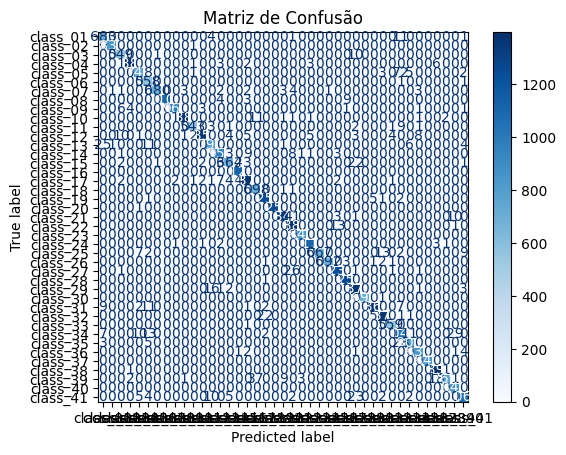

In [23]:
plot_training_history(history=history_mobilenet_small_v1)
performance_metrics(model=model_mobilenetv3_small_v1,
                    test_dataset=test_images_norm,
                    class_names=train_class_names
                    )